# Text Embedding
## Discover Node Information
Install Natural Language Processing ToolKit

In [2]:
!pip3 install nltk

  Using cached https://files.pythonhosted.org/packages/f6/1d/d925cfb4f324ede997f6d47bea4d9babba51b49e87a767c170b77005889d/nltk-3.4.5.zip
  Created wheel for nltk: filename=nltk-3.4.5-cp37-none-any.whl size=1449908 sha256=5f0cc01c1f6db924735ab7ddfa633fe0bdaa9075063b3884bdb15208d22e3053
  Stored in directory: /Users/aubrydandoque/Library/Caches/pip/wheels/96/86/f6/68ab24c23f207c0077381a5e3904b2815136b879538a24b483
Successfully built nltk


## Getting Stopwords

In [62]:
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import json
import matplotlib.pyplot as plt
import numpy as np

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aubrydandoque/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Download pre-generated list of common words and words root dictionnary

Let import the data in a dict to access it

In [42]:
from joblib import Parallel, delayed
import multiprocessing
import os

#set path to the data directory
directory = os.fsencode('./data/node_information/text')

#Highest index of node we want to precess
max_node = 1000

node_info = {}

In [28]:
# Sequential computation if wanted but longer

#for file in os.listdir(directory):
#     filename = os.fsdecode(file)
#     if filename.endswith(".txt") :
#         with open('./data/node_information/text/'+filename, 'r', encoding='utf-8', errors='ignore') as cur_file:
#            node_info[filename[:-4]] = ''' '''
#            for line in cur_file:
#                data = line.replace('\n', '')
#                node_info[filename[:-4]] += data

KeyboardInterrupt: 

In [ ]:
def processFile(file):
    ### write an entry on node_info as node_nb : text where node info is the title of the doc
        
    filename = os.fsdecode(file)
    if filename.endswith(".txt") and int(filename[:-4]) < max_node :
         with open('./data/node_information/text/'+filename, 'r', encoding='utf-8', errors='ignore') as cur_file:
            node_info[filename[:-4]] = ''' '''
            for line in cur_file:
                data = line.replace('\n', '')
                node_info[filename[:-4]] += data

In [0]:
#Get number of available CPU on computer
num_cores = multiprocessing.cpu_count()
print("%s cores available, going to use %s for parallel computation" %[num_cores, num_cores-1])
#Run parallel computation with joblib
Parallel(n_jobs = -2, require='sharedmem')(delayed(processFile)(file) for file in os.listdir(directory))

In [0]:
# Print node_info to json
with open('./data/node_information/node_info.json', 'w') as file:
    json.dump(node_info, file)

In [53]:
tokenizer = nltk.RegexpTokenizer(r'\w+')
# ew dict for tokenized form
node_info_tokenized = {}

In [ ]:
def tokenize_dict(node):
    node_info_tokenized[node] = tokenizer.tokenize(node_info[node])
    
Parallel(n_jobs = -2, require='sharedmem')(delayed(tokenize_dic)(node) for node in node_info)

with open('./data/node_information/node_info_token.json', 'w') as file:
    json.dump(node_info_tokenized, file)

## Bag of words
Text embedding as a dictionnary and occurence count
https://www.datacamp.com/community/tutorials/text-analytics-beginners-nltk

In [3]:
# load data from file

In [17]:
with open('./data/computed/node_info_token.json', 'r') as f:
    node_info_tokenized = json.load(f)
node_info_tokenized = {int(k):v for k,v in node_info_tokenized.items()}
print(node_info_tokenized[1])

with open('./data/computed/node_info.json', 'r') as f:
    node_info = json.load(f)
node_info = {int(k):v for k,v in node_info.items()}
print(node_info[1])

['alternate', 'alternate', 'wa', 'pj', 's', '559638', 's2', 'p', 'home', 'stc', 'idsite', 'idclient', 'Raison', 'sociale', 'Raison', 'sociale', 'Raison', 'sociale', 'Raison', 'sociale', 'Compétences', 'Divorce', 'Séparation', 'Droit', 'de', 'la', 'famille', 'Droit', 'du', 'travail', 'Droit', 'immobilier', 'Droit', 'pénal', 'Permis', 'de', 'conduire', 'Préjudice', 'corporel', 'Honoraires', 'Cabinet', 'de', 'Barr', 'Cabinet', 'de', 'Strasbourg', 'contact', '____________________', 'Submit', 'Un', 'ENJEU', 'une', 'PASSION', 'vous', 'DÉFENDRE', 'Maître', 'Grégory', 'Engel', 'vous', 'assiste', 'et', 'vous', 'représente', 'Prendre', 'rendez', 'vousMaître', 'Grégory', 'Engel', 'avocat', 'généraliste', 'à', 'Strasbourg', 'et', 'à', 'Barr', 'Depuis', 'plus', 'de', '15', 'ans', 'Maître', 'Grégory', 'Engel', 'Avocat', 'vous', 'conseille', 'pour', 'la', 'négociation', 'amiable', 'engage', 'vos', 'procédures', 'et', 'assure', 'la', 'défense', 'de', 'vos', 'droits', 'à', 'Strasbourg', 'à', 'Barr', 'e

    #alternate alternate   [wa.pj?s=559638&s2=&p=home&stc={idsite:'',idclient:''}]   Raison sociale Raison sociale Raison sociale Raison sociale     * Compétences          + Divorce/Séparation          + Droit de la famille          + Droit du travail          + Droit immobilier          + Droit pénal          + Permis de conduire          + Préjudice corporel     * Honoraires     * Cabinet de Barr     * Cabinet de Strasbourg     * contact   ____________________ Submit   « Un ENJEU, une PASSION,   vous DÉFENDRE »   Maître Grégory Engel   vous assiste et vous représente   Prendre rendez-vousMaître Grégory Engel, avocat généraliste à Strasbourg et à Barr   Depuis plus de 15 ans, Maître Grégory Engel, Avocat, vous conseille   pour la négociation amiable, engage vos procédures et assure la défense   de vos droits, à Strasbourg, à Barr et dans toute la France.   En tant qu’avocat généraliste, il intervient dans de nombreux domaines   du droit, notamment en matière de divorce   et de droit d

In [40]:
## Bag of word for each node or for all the nodes at once ?
from nltk.probability import FreqDist

#counting word frequency in text
fdist = FreqDist(node_info_tokenized[1])
fdist2 = FreqDist(node_info_tokenized[2])

print(fdist)

<FreqDist with 685 samples and 3918 outcomes>


Use bag of word to plot most commin words, fix a limit of useless common words and remove them from bag of words

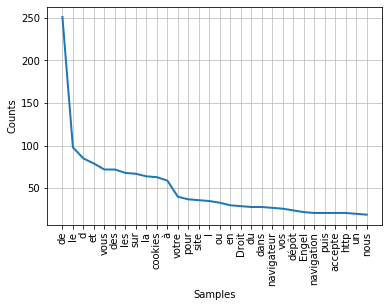

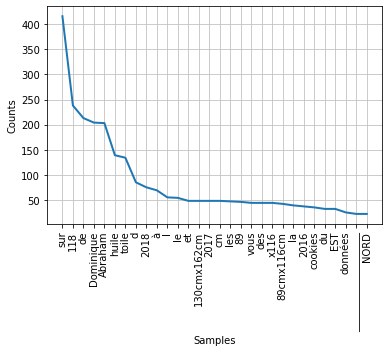

In [37]:
fdist.plot(30,cumulative=False)
fdist2.plot(30,cumulative=False)
plt.show()

Remark : None of the 30 most recurent words give context to the page. Need to remove stop words

In [58]:
stop_words = stopwords.words('french')
print("10 most used french words")
print(stop_words[0:10])

10 most used french words
['au', 'aux', 'avec', 'ce', 'ces', 'dans', 'de', 'des', 'du', 'elle']


In [43]:
node_info_filtered = {}

def remove_stopwords(node):
    node_info_filtered[node] = []
    for w in node_info_tokenized[node]:
        if w not in stop_words:
            node_info_filtered[node].append(w)
    
Parallel(n_jobs = -2, require='sharedmem')(delayed(remove_stopwords)(node) for node in node_info_tokenized)

#remove_stopwords(1)

10 most used french words
['au', 'aux', 'avec', 'ce', 'ces', 'dans', 'de', 'des', 'du', 'elle']


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [ ]:
with open('./data/node_information/node_info_filtereder.json', 'w') as file:
    json.dump(node_info_filtered, file)

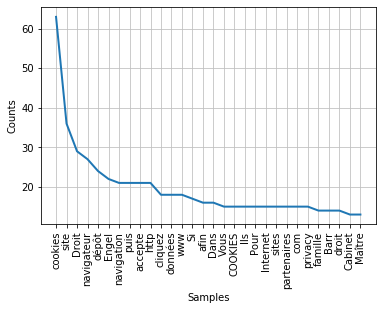

In [29]:
fdist = FreqDist(node_info_filtered[1])
fdist.plot(30,cumulative=False)
plt.show()

Remark : we now see that some words appear multiple times with differents typo. Need to Normalize the lexicon (Lemmization and Stemming)

In [44]:
sno = SnowballStemmer('french')
print("Linguistic root of \'aimer\'")
print(sno.stem('aimer'))

node_info_snl = {}

def stemming_lemming(node):
    node_info_snl[node] = []
    for w in node_info_filtered[node]:
        node_info_snl[node].append(sno.stem(w))
    
Parallel(n_jobs = -2, require='sharedmem')(delayed(stemming_lemming)(node) for node in node_info_filtered)

#stemming_lemming(1)

Linguistic root of 'aimer'
aim


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [ ]:
with open('./data/node_information/node_info_snl.json', 'w') as file:
    json.dump(node_info_snl, file)

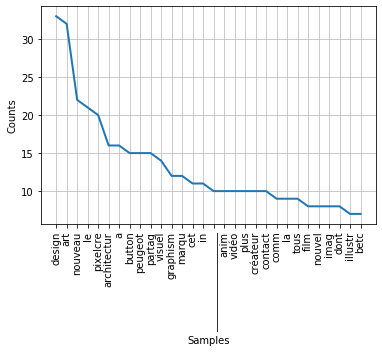

In [47]:
fdist = FreqDist(node_info_snl[999])
fdist.plot(30,cumulative=False)
plt.show()

In [100]:
#cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
#text_counts= cv.fit_transform(data['Phrase'])

import pandas as pd 

dict_full = []
def build_voca(node):
    for w in node_info_snl[node]:
        if w not in dict_full:
            dict_full.append(w)
#build_voca(1)          
Parallel(n_jobs = -2, require='sharedmem')(delayed(build_voca)(node) for node in node_info_snl)

KeyboardInterrupt: 

In [86]:
with open('./data/node_information/dict.json', 'w') as file:
    json.dump(dict_full, file)

In [87]:
print(dict_full)

['alternat', 'wa', 'pj', '559638', 's2', 'p', 'hom', 'stc', 'idsit', 'idclient', 'raison', 'social', 'compétent', 'divorc', 'sépar', 'droit', 'famill', 'travail', 'immobili', 'pénal', 'perm', 'conduir', 'préjudic', 'corporel', 'honorair', 'cabinet', 'barr', 'strasbourg', 'contact', '____________________', 'subm', 'un', 'enjeu', 'passion', 'défendr', 'maîtr', 'grégory', 'engel', 'assist', 'représent', 'prendr', 'rend', 'vousmaîtr', 'avocat', 'général', 'depuis', 'plus', '15', 'an', 'conseil', 'négoci', 'amiabl', 'engag', 'procédur', 'assur', 'défens', 'tout', 'franc', 'en', 'tant', 'intervient', 'nombreux', 'domain', 'not', 'mati', 'il', 'égal', 'répar', 'suit', 'accident', 'cadr', 'contenti', 'demand', 'conseilrencontr', 'celuid', 'barreau', 'auss', 'bien', 'bas', 'rhin', 'dev', 'cour', 'tous', 'tribunal', 'dispos', 'deux', 'second', 'reçoit', 'adress', 'conven', 'trait', 'personnel', 'chaqu', 'dossi', 'montr', 'disponibl', 'réactif', 'met', 'œuvr', 'men', 'pré', 'respect', 'regl', 'dé

In [99]:
bow = {}
def build_bag(node):
    bow[node] = np.zeros(shape=len(dict_full), dtype = int)
    for w in node_info_snl[node]:
        bow[int(node)][dict_full.index(w)] += 1            
    bow[node] = bow[node].tolist()
#build_bag(1)
Parallel(n_jobs = -2, require='sharedmem')(delayed(build_bag)(node) for node in node_info_snl)

ValueError: 'looking' is not in list

In [98]:
print(bow)

{1: [4, 3, 3, 3, 3, 3, 1, 3, 3, 3, 12, 15, 6, 11, 10, 48, 14, 12, 12, 8, 9, 9, 9, 9, 3, 22, 18, 12, 5, 3, 2, 1, 1, 1, 1, 13, 11, 22, 4, 7, 5, 6, 1, 13, 5, 2, 5, 3, 3, 7, 1, 2, 1, 5, 5, 3, 9, 2, 6, 2, 1, 2, 2, 1, 2, 19, 5, 1, 1, 1, 2, 4, 5, 1, 1, 1, 4, 2, 4, 1, 1, 2, 10, 1, 1, 2, 1, 1, 11, 1, 5, 4, 1, 2, 1, 1, 1, 1, 4, 2, 1, 4, 2, 1, 1, 1, 1, 3, 1, 9, 7, 1, 2, 1, 6, 18, 4, 1, 1, 1, 1, 1, 1, 1, 4, 15, 2, 1, 4, 3, 16, 10, 1, 1, 8, 7, 5, 3, 1, 8, 7, 1, 1, 1, 3, 1, 1, 2, 8, 4, 2, 1, 4, 1, 4, 1, 1, 1, 1, 1, 1, 8, 1, 1, 1, 2, 2, 4, 2, 1, 1, 1, 2, 2, 1, 1, 7, 1, 1, 1, 2, 1, 1, 1, 3, 1, 1, 1, 1, 6, 2, 1, 1, 1, 5, 1, 6, 3, 6, 3, 3, 3, 3, 12, 3, 3, 6, 6, 6, 3, 3, 3, 3, 3, 6, 6, 3, 3, 3, 3, 3, 6, 6, 84, 6, 3, 3, 3, 3, 3, 3, 24, 3, 6, 12, 3, 51, 3, 12, 3, 3, 6, 9, 3, 6, 6, 12, 3, 24, 3, 6, 3, 3, 3, 3, 3, 3, 3, 6, 9, 48, 3, 6, 3, 3, 15, 12, 6, 3, 16, 6, 3, 3, 3, 3, 3, 3, 3, 15, 6, 33, 9, 15, 21, 6, 6, 12, 3, 3, 6, 3, 12, 3, 12, 3, 3, 12, 12, 3, 27, 3, 3, 3, 3, 3, 3, 3, 6, 3, 6, 6, 3, 3, 18, 3, 12, 9

In [91]:
with open('./data/node_information/BOW.json', 'w') as file:
    json.dump(bow, file)


TypeError: Object of type ndarray is not JSON serializable

In [13]:
##print BOW to json for using in the ML algo

## Word2Vec

Embbed the word 

In [73]:
a = np.array([[1],[2]])
print(a.shape)

(2, 1)
